## CAPITULO 1: CONCEPTOS BÁSICOS

### A) Tipos de inversiones financieras

+ **Gestión de carteras**: análisis títulos, análisis carteras y selección de las carteras óptimas (min. reisgo y max. rentabilidad)

+ **Administración de inversiones**: establecer polítca de inversión (sujeta al perfil de riesgo del cliente), análisis títulos, formalización y análisis de las carteras, selección de la cartera y evaluación periódica de sus resultados.


### B) Medidas de rentabilidad

- **Rentabilidad simple**: 
    - Mide el cambio de valor de un activo sin reinversión.
    - Cálculo: $C_n=C_0·(1+n·r)$; $r=((C_n/C_0)-1)/n$


- **Rentabilidad compuesta** 
    - Mide el cambio de valor de un activo cuando sus rendimientos son reinvertidos. Utilizado para evaluación de carteras
    - Cálculo: $C_n=C_0·(1+i)^n$; $i=(C_n/C_0)^1/n -1$

- **Rentabilidad continua**
    - Mide el cambio de valor de un activo cuando su reinversión es infinitamente frecuente. Utilizado para evaluar dereivados.
    - Cálculo: $C_n=C_0·e^nk$; $k=ln(C_n/C_0)/n$

### Ejercicio 1.1.

| 0 | tr1. | 
| ---- | ---- |
| -42 | 42+1.5 |

Dado dicho horizonte temporal, calcular:
- Rentabilidad mensual, trimestral y anual, simple, compuesta y continua y comparar su igualdad temporal

In [ ]:
# Rentabilidad simple
rm=((43.5/42)-1)/3
print("Rentabilidad mensual lineal:", round(rm*100,4), "%")
rt=(43.5/42)-1
print("Rentabilidad trimestral lineal:", round(rt*100,4), "%")
ra=((43.5/42)-1)*4
print("Rentabilidad anual lineal:", round(ra*100,4), "%")
print("Igualdad de las rentabilidades: (1+rm)*3=(1+rt)=(1+ra)/4")

Rentabilidad mensual lineal: 1.1905 %
Rentabilidad trimestral lineal: 3.5714 %
Rentabilidad anual lineal: 14.2857 %
Igualdad de los rentabilidades: (1+rm)^3=(1+rt)=(1+ra)^1/3


In [ ]:
# Rentabilidad compuesta
im=((43.5/42)**(1/3))-1
print("Rentabilidad mensual compuesta:", round(im*100,4), "%")
it=(43.5/42)-1
print("Rentabilidad trimestral compuesta:", round(it*100,4), "%")
ia=((43.5/42)**(4))-1
print("Rentabilidad anual compuesta:", round(ia*100,4), "%")
print("Igualdad de las rentabilidades: (1+im)^3=(1+it)=(1+ia)^1/4")

Rentabilidad mensual compuesta: 1.1766 %
Rentabilidad trimestral compuesta: 3.5714 %
Rentabilidad anual compuesta: 15.0694 %


In [ ]:
import nunmpy as np
# Rentabilidad continua
km=np.log(43.5/42)/3
print("Rentabilidad mensual continua:", round(km*100,4), "%")
kt=np.log(43.5/42)
print("Rentabilidad trimestral compuesta:", round(kt*100,4), "%")
ka=np.log(43.5/42)*4
print("Rentabilidad anual compuesta:", round(ka*100,4), "%")
print("Igualdad de las rentabilidades: km*3=kt=ka/4")

Rentabilidad mensual continua: 1.1697 %
Rentabilidad trimestral compuesta: 3.5091 %
Rentabilidad anual compuesta: 14.0365 %
Igualdad de las rentabilidades: km*3=kt=ka/4


### Ejercicio 1.2.

| 0 | m1 | m2 | m3 | m4 | m5 | m6 | m7 |
| --- | --- | --- | --- | --- | --- | --- | --- |
| -120 | 121.20 | 123 | 125 | 124 | 125.62 | 127.32 | 128 |


Dado dicho horizonte temporal, calcular:

- La rentabilidad de cada mes y rentabilidad media mensual (simple y continua).

- La rentabilidad mensual.

- La rentabilidad anual.

- Comparar las distintas medidas de la rentabilidad.

In [33]:
#Rentabilidad por cada mes y media mensual
import pandas as pd
import numpy as np

precio=pd.DataFrame({"Mes": [0,1,2,3,4,5,6,7],
    "Cotización": [120,121.20,123,125,124,125.62,127.32,128]})
precio.set_index("Mes", inplace=True)
precio["R Simple"]=precio["Cotización"].pct_change()*100
precio["R instantánea"]=np.log(precio["Cotización"]/precio["Cotización"].shift())*100
#Con .shift(1) seleccionamos la fila anterior a la actual

print("Cuadro resumen de las rentabilidades: ")
print("--------------------------------------")
print(precio)
print("--·------------------------------------")
print("Rentabilidad simple media:", round(precio["R Simple"].mean(),5),"%")
print("--------------------------------------")
print("Rentabilidad instantánea media:", round(precio["R instantánea"].mean(),5),"%")


Cuadro resumen de las rentabilidades: 
--------------------------------------
     Cotización  R Simple  R instantánea
Mes                                     
0        120.00       NaN            NaN
1        121.20  1.000000       0.995033
2        123.00  1.485149       1.474228
3        125.00  1.626016       1.612938
4        124.00 -0.800000      -0.803217
5        125.62  1.306452       1.297991
6        127.32  1.353288       1.344213
7        128.00  0.534087       0.532666
--·------------------------------------
Rentabilidad simple media: 0.92928 %
--------------------------------------
Rentabilidad instantánea media: 0.92198 %


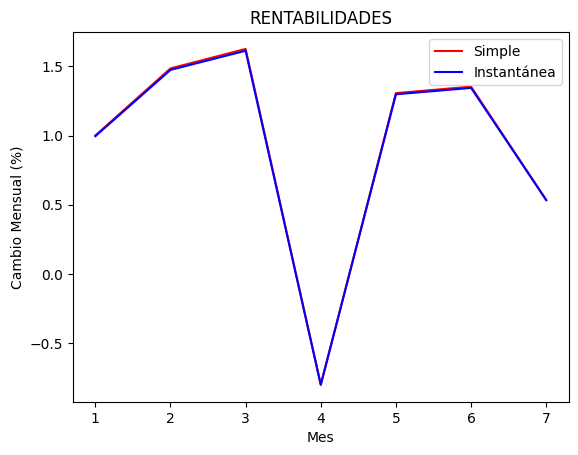

In [38]:
#Rentabilidad por cada mes y media mensual gráficamente
import matplotlib.pyplot as plt

plt.plot(precio["R Simple"], color="red", label="Simple")
plt.plot(precio["R instantánea"], color="blue", label="Instantánea")
plt.title("RENTABILIDADES")
plt.ylabel("Cambio Mensual (%)")
plt.xlabel("Mes")
plt.legend()
plt.show()

In [46]:
#Rentabilidad mensual
## Simple: 128= 120·(1+7*rm)
rm=((precio["Cotización"].iloc[7]/precio["Cotización"].iloc[0])-1)/7
print("Rentabilidad mensual simple:", round(rm*100,5), "%")

## Compuesta: 128=120·(1+im)^7
im=(precio["Cotización"].iloc[7]/precio["Cotización"].iloc[0])**(1/7)-1
print("Rentabilidad mensual compuesta:", round(im*100,5), "%")

Rentabilidad mensual simple: 0.95238 %
Rentabilidad mensual compuesta: 0.92624 %


In [41]:
precio["Cotización"].iloc[7]

np.float64(128.0)